In [1]:
#imports for user defined functions
import acquire as aq
import prepare as prep
import explore as ex

# Imports for arithmetic calculations and data frame manipulation
import math
import numpy as np
import pandas as pd

#Imports for statistical analysis
from scipy import stats
import statistics

#Imports for creating visualizations
import matplotlib.pyplot as plt 
import seaborn as sns

#Imports for modeling and model evaluation
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

**Acquire and clean using user defined functions**

In [2]:
#Acquire data using user defined function 
telco = aq.get_telco_data()
#Use prepare.py to clean and split data frame
df = prep.prep_telco(telco)
train, validate, test = prep.split_telco_data(df)
#Use prepare.py to create x and y variables
X_train, y_train, X_validate, y_validate, X_test, y_test = prep.create_xy(train, validate, test)

Using cached csv...


# Modeling #

In [3]:
# Calculate the baseline for train data set

baseline = (train.churn == 1).mean()
print(f'Our baseline accuracy is {baseline}. We can compare our model accuracy to this figure.')

Our baseline accuracy is 0.2656845313690627. We can compare our model accuracy to this figure.


## Models Using All Features ##

**Decision Trees**

In [4]:
#Model 1

clf1 = DecisionTreeClassifier(random_state=123)

clf1 = clf1.fit(X_train, y_train)

In [5]:
# Creating predictions and evaluating 

X = X_train
y = y_train

accuracy1 = clf1.score(X, y)
y_pred = clf1.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy1:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.998
The True Positive Rate is 0.992, The False Positive Rate is 0.0,
The True Negative Rate is 1.0, and the False Negative Rate is 0.00765



,precision,recall,f1-score,support
0,0.997240,1.000000,0.998618,2891.000000
1,1.000000,0.992352,0.996161,1046.000000
accuracy,0.997968,0.997968,0.997968,0.997968
macro avg,0.998620,0.996176,0.997390,3937.000000
weighted avg,0.997974,0.997968,0.997965,3937.000000


*Model with lower max depth to reduce overfitting.*

In [6]:
#Model 2

clf2 = DecisionTreeClassifier(max_depth=3, random_state=123)

clf2 = clf2.fit(X_train, y_train)

In [7]:
# Creating predictions and evaluating 

X = X_train
y = y_train

accuracy2 = clf2.score(X, y)
y_pred = clf2.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy2:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.7981
The True Positive Rate is 0.401, The False Positive Rate is 0.0581,
The True Negative Rate is 0.942, and the False Negative Rate is 0.599



,precision,recall,f1-score,support
0,0.812836,0.941889,0.872617,2891.00000
1,0.713799,0.400574,0.513166,1046.00000
accuracy,0.798070,0.798070,0.798070,0.79807
macro avg,0.763317,0.671231,0.692891,3937.00000
weighted avg,0.786523,0.798070,0.777116,3937.00000


**K-Nearest Neighor Model**

In [8]:
# Model 3

knn1 = KNeighborsClassifier()
knn1 = knn1.fit(X_train, y_train)

In [9]:
# Creating predictions and evaluating 

X = X_train
y = y_train

accuracy3 = knn1.score(X, y)
y_pred = knn1.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy3:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.8313
The True Positive Rate is 0.58, The False Positive Rate is 0.0778,
The True Negative Rate is 0.922, and the False Negative Rate is 0.42



,precision,recall,f1-score,support
0,0.858615,0.922172,0.889260,2891.000000
1,0.729567,0.580306,0.646432,1046.000000
accuracy,0.831344,0.831344,0.831344,0.831344
macro avg,0.794091,0.751239,0.767846,3937.000000
weighted avg,0.824329,0.831344,0.824744,3937.000000


*Model with lower K value to reduce overfitting*

In [10]:
#Model 4
# Create and fit K-Nearest Neighbor model *Default is 5

knn2 = KNeighborsClassifier(n_neighbors = 3)
knn2 = knn2.fit(X_train, y_train)

In [11]:
# Creating predictions and evaluating 

X = X_train
y = y_train

accuracy4 = knn2.score(X, y)
y_pred = knn2.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy4:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.8595
The True Positive Rate is 0.662, The False Positive Rate is 0.0688,
The True Negative Rate is 0.931, and the False Negative Rate is 0.338



,precision,recall,f1-score,support
0,0.883782,0.931166,0.906855,2891.000000
1,0.776655,0.661568,0.714507,1046.000000
accuracy,0.859538,0.859538,0.859538,0.859538
macro avg,0.830219,0.796367,0.810681,3937.000000
weighted avg,0.855320,0.859538,0.855751,3937.000000


*Model with higher K value*

In [12]:
#Model 5
# Create and fit K-Nearest Neighbor model 

knn3 = KNeighborsClassifier(n_neighbors = 10)
knn3 = knn3.fit(X_train, y_train)

In [13]:
# Creating predictions and evaluating 

X = X_train
y = y_train

accuracy5 = knn3.score(X, y)
y_pred = knn3.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy5:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.8092
The True Positive Rate is 0.41, The False Positive Rate is 0.0464,
The True Negative Rate is 0.954, and the False Negative Rate is 0.59



,precision,recall,f1-score,support
0,0.817131,0.953649,0.880128,2891.000000
1,0.761989,0.410134,0.533250,1046.000000
accuracy,0.809246,0.809246,0.809246,0.809246
macro avg,0.789560,0.681892,0.706689,3937.000000
weighted avg,0.802481,0.809246,0.787968,3937.000000


**Logistic Regression Models**

In [14]:
# Model 6
# Create our logistic regression model 

logit1 = LogisticRegression(random_state=123)
logit1 = logit1.fit(X_train, y_train)

In [15]:
# Creating predictions and evaluating 

X = X_train
y = y_train

accuracy6 = logit1.score(X, y)
y_pred = logit1.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy6:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.8026
The True Positive Rate is 0.547, The False Positive Rate is 0.105,
The True Negative Rate is 0.895, and the False Negative Rate is 0.453



,precision,recall,f1-score,support
0,0.845199,0.895192,0.869478,2891.000000
1,0.653714,0.546845,0.595523,1046.000000
accuracy,0.802642,0.802642,0.802642,0.802642
macro avg,0.749457,0.721019,0.732500,3937.000000
weighted avg,0.794325,0.802642,0.796692,3937.000000


*Model with class_weight balanced*

In [16]:
# Model 7
# Create logistic regression model

logit2 = LogisticRegression(random_state=123, class_weight='balanced')
logit2 = logit2.fit(X_train, y_train)

In [17]:
# Creating predictions and evaluating 

X = X_train
y = y_train

accuracy7 = logit2.score(X, y)
y_pred = logit2.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy7:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.7546
The True Positive Rate is 0.805, The False Positive Rate is 0.264,
The True Negative Rate is 0.736, and the False Negative Rate is 0.195



,precision,recall,f1-score,support
0,0.912559,0.736423,0.815084,2891.000000
1,0.524938,0.804971,0.635472,1046.000000
accuracy,0.754636,0.754636,0.754636,0.754636
macro avg,0.718748,0.770697,0.725278,3937.000000
weighted avg,0.809574,0.754636,0.767364,3937.000000


## Models Using Top 5 Features ##

**Random Forest Models**

In [18]:
# Model 8
# Create and fit Random Forest Model

top_5_features=['electronic_check', 'monthly_contract', 'fiber_optic', 'monthly_charges', 'paperless_billing']

rf1 = RandomForestClassifier(min_samples_leaf=1, max_depth=10, random_state=123)
rf1 = rf1.fit(X_train[top_5_features], y_train)

In [19]:
# Creating predictions and evaluating 

X = X_train[top_5_features]
y = y_train

accuracy8 = rf1.score(X, y)
y_pred = rf1.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy8:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.8593
The True Positive Rate is 0.676, The False Positive Rate is 0.0744,
The True Negative Rate is 0.926, and the False Negative Rate is 0.324



,precision,recall,f1-score,support
0,0.887562,0.925631,0.906197,2891.000000
1,0.766811,0.675908,0.718496,1046.000000
accuracy,0.859284,0.859284,0.859284,0.859284
macro avg,0.827187,0.800770,0.812347,3937.000000
weighted avg,0.855481,0.859284,0.856328,3937.000000


*Trying a model with different paramaters*

In [20]:
# Model 9
# Create and fit Random Forest Model

rf2 = RandomForestClassifier(min_samples_leaf=2, max_depth=15, random_state=123)
rf2 = rf2.fit(X_train[top_5_features], y_train)

In [21]:
# Creating predictions and evaluating 

X = X_train[top_5_features]
y = y_train

accuracy9 = rf2.score(X, y)
y_pred = rf2.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy9:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.8738
The True Positive Rate is 0.702, The False Positive Rate is 0.064,
The True Negative Rate is 0.936, and the False Negative Rate is 0.298



,precision,recall,f1-score,support
0,0.896620,0.936008,0.915891,2891.000000
1,0.798694,0.701721,0.747074,1046.000000
accuracy,0.873762,0.873762,0.873762,0.873762
macro avg,0.847657,0.818865,0.831482,3937.000000
weighted avg,0.870603,0.873762,0.871039,3937.000000


**KNN Models**

In [22]:
# Model 10
# Create and fit K-Nearest Neighbor model 

knn3 = KNeighborsClassifier()
knn3 = knn3.fit(X_train[top_5_features], y_train)

In [23]:
# Creating predictions and evaluating 

X = X_train[top_5_features]
y = y_train

accuracy10 = knn3.score(X, y)
y_pred = knn3.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy10:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.8245
The True Positive Rate is 0.601, The False Positive Rate is 0.0948,
The True Negative Rate is 0.905, and the False Negative Rate is 0.399



,precision,recall,f1-score,support
0,0.862558,0.905223,0.883376,2891.000000
1,0.696567,0.601338,0.645459,1046.000000
accuracy,0.824486,0.824486,0.824486,0.824486
macro avg,0.779562,0.753281,0.764417,3937.000000
weighted avg,0.818457,0.824486,0.820165,3937.000000


*Try one with lower K value*

In [24]:
# Model 11
# Create and fit K-Nearest Neighbor model 

knn4 = KNeighborsClassifier(n_neighbors=3)
knn4 = knn4.fit(X_train[top_5_features], y_train)

In [25]:
# Creating predictions and evaluating 

X = X_train[top_5_features]
y = y_train

accuracy11 = knn4.score(X, y)
y_pred = knn4.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy11:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.8489
The True Positive Rate is 0.661, The False Positive Rate is 0.083,
The True Negative Rate is 0.917, and the False Negative Rate is 0.339



,precision,recall,f1-score,support
0,0.881903,0.916984,0.899101,2891.00000
1,0.742213,0.660612,0.699039,1046.00000
accuracy,0.848870,0.848870,0.848870,0.84887
macro avg,0.812058,0.788798,0.799070,3937.00000
weighted avg,0.844789,0.848870,0.845948,3937.00000


**Logistic Regression Models**

In [26]:
# Model 12
#Create logistic regresssion model

logit3 = LogisticRegression(random_state=123)
logit3 = logit3.fit(X_validate[top_5_features], y_validate)

In [27]:

X = X_validate[top_5_features]
y = y_validate

accuracy12 = logit3.score(X, y)
y_pred = logit3.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy12:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.7666
The True Positive Rate is 0.352, The False Positive Rate is 0.0831,
The True Negative Rate is 0.917, and the False Negative Rate is 0.648



,precision,recall,f1-score,support
0,0.796076,0.916868,0.852213,1239.000000
1,0.605364,0.351893,0.445070,449.000000
accuracy,0.766588,0.766588,0.766588,0.766588
macro avg,0.700720,0.634381,0.648642,1688.000000
weighted avg,0.745347,0.766588,0.743915,1688.000000


## Models Using Top 2 Features ##

**Decision Trees**

In [28]:
# Model 13
#Create and fit our model

top_2_features = ['monthly_contract', 'fiber_optic']

clf3 = DecisionTreeClassifier(random_state=123)

clf3 = clf3.fit(X_train[top_2_features], y_train)

In [29]:
# Creating predictions and evaluating 

X = X_train[top_2_features]
y = y_train

accuracy13 = clf3.score(X, y)
y_pred = clf3.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy13:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.7724
The True Positive Rate is 0.629, The False Positive Rate is 0.176,
The True Negative Rate is 0.824, and the False Negative Rate is 0.371



,precision,recall,f1-score,support
0,0.859978,0.824282,0.841752,2891.000000
1,0.564322,0.629063,0.594937,1046.000000
accuracy,0.772416,0.772416,0.772416,0.772416
macro avg,0.712150,0.726673,0.718344,3937.000000
weighted avg,0.781427,0.772416,0.776177,3937.000000


**KNN Model**

In [30]:
# Model 14
# Create and fit K-Nearest Neighbor model 

knn5 = KNeighborsClassifier(n_neighbors=3)
knn5 = knn5.fit(X_train[top_2_features], y_train)

In [31]:
# Creating predictions and evaluating 

X = X_train[top_2_features]
y = y_train

accuracy14 = knn5.score(X, y)
y_pred = knn5.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy14:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.7724
The True Positive Rate is 0.629, The False Positive Rate is 0.176,
The True Negative Rate is 0.824, and the False Negative Rate is 0.371



,precision,recall,f1-score,support
0,0.859978,0.824282,0.841752,2891.000000
1,0.564322,0.629063,0.594937,1046.000000
accuracy,0.772416,0.772416,0.772416,0.772416
macro avg,0.712150,0.726673,0.718344,3937.000000
weighted avg,0.781427,0.772416,0.776177,3937.000000


**Compare all my Models Scores to decide which to use on evaluate and the test**

In [32]:
print(f'''Model 1: {accuracy1}''')
print(f'''Model 2: {accuracy2}''')
print(f'''Model 3: {accuracy3}''')
print(f'''Model 4: {accuracy4}''')
print(f'''Model 5: {accuracy5}''')
print(f'''Model 6: {accuracy6}''')
print(f'''Model 7: {accuracy7}''')
print(f'''Model 8: {accuracy8}''')
print(f'''Model 9: {accuracy9}''')
print(f'''Model 10: {accuracy10}''')
print(f'''Model 11: {accuracy11}''')
print(f'''Model 12: {accuracy12}''')
print(f'''Model 13: {accuracy13}''')
print(f'''Model 14: {accuracy14}''')

Model 1: 0.9979679959359918
Model 2: 0.7980695961391923
Model 3: 0.8313436626873254
Model 4: 0.8595377190754382
Model 5: 0.809245618491237
Model 6: 0.8026416052832106
Model 7: 0.7546355092710185
Model 8: 0.8592837185674371
Model 9: 0.873761747523495
Model 10: 0.824485648971298
Model 11: 0.8488696977393955
Model 12: 0.7665876777251185
Model 13: 0.7724155448310897
Model 14: 0.7724155448310897


**I'll fit my top 5 models to validate and select the best 3 from those.**

*Top 5 : Model 1, Model 9, Model 8, Model 4, Model 11*

In [33]:
#Model 1 Validate

clf1 = DecisionTreeClassifier(random_state=123)

clf1 = clf1.fit(X_validate, y_validate)

In [34]:
# Creating predictions and evaluating 

X = X_validate
y = y_validate

accuracy1 = clf1.score(X, y)
y_pred = clf1.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy1:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.9994
The True Positive Rate is 0.998, The False Positive Rate is 0.0,
The True Negative Rate is 1.0, and the False Negative Rate is 0.00223



,precision,recall,f1-score,support
0,0.999194,1.000000,0.999597,1239.000000
1,1.000000,0.997773,0.998885,449.000000
accuracy,0.999408,0.999408,0.999408,0.999408
macro avg,0.999597,0.998886,0.999241,1688.000000
weighted avg,0.999408,0.999408,0.999407,1688.000000


In [35]:
#Model 4 Validate
# Create and fit K-Nearest Neighbor model *Default is 5

knn2 = KNeighborsClassifier(n_neighbors = 3)
knn2 = knn2.fit(X_validate, y_validate)

In [36]:
# Creating predictions and evaluating 

X = X_validate
y = y_validate

accuracy4 = knn2.score(X, y)
y_pred = knn2.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy4:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.8549
The True Positive Rate is 0.628, The False Positive Rate is 0.063,
The True Negative Rate is 0.937, and the False Negative Rate is 0.372



,precision,recall,f1-score,support
0,0.874247,0.937046,0.904558,1239.000000
1,0.783333,0.628062,0.697157,449.000000
accuracy,0.854858,0.854858,0.854858,0.854858
macro avg,0.828790,0.782554,0.800857,1688.000000
weighted avg,0.850064,0.854858,0.849390,1688.000000


In [37]:
# Model 8 Validate
# Create and fit Random Forest Model

top_5_features=['electronic_check', 'monthly_contract', 'fiber_optic', 'monthly_charges', 'paperless_billing']

rf1 = RandomForestClassifier(min_samples_leaf=1, max_depth=10, random_state=123)
rf1 = rf1.fit(X_validate[top_5_features], y_validate)

In [38]:
# Creating predictions and evaluating 

X = X_validate[top_5_features]
y = y_validate

accuracy8 = rf1.score(X, y)
y_pred = rf1.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy8:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.904
The True Positive Rate is 0.733, The False Positive Rate is 0.0339,
The True Negative Rate is 0.966, and the False Negative Rate is 0.267



,precision,recall,f1-score,support
0,0.908884,0.966102,0.936620,1239.000000
1,0.886792,0.732739,0.802439,449.000000
accuracy,0.904028,0.904028,0.904028,0.904028
macro avg,0.897838,0.849421,0.869529,1688.000000
weighted avg,0.903008,0.904028,0.900928,1688.000000


In [39]:
# Model 9 Validate
# Create and fit Random Forest Model

rf2 = RandomForestClassifier(min_samples_leaf=2, max_depth=15, random_state=123)
rf2 = rf2.fit(X_validate[top_5_features], y_validate)

In [40]:
# Creating predictions and evaluating 

X = X_validate[top_5_features]
y = y_validate

accuracy9 = rf2.score(X, y)
y_pred = rf2.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy9:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.8809
The True Positive Rate is 0.699, The False Positive Rate is 0.0533,
The True Negative Rate is 0.947, and the False Negative Rate is 0.301



,precision,recall,f1-score,support
0,0.896789,0.946731,0.921084,1239.000000
1,0.826316,0.699332,0.757539,449.000000
accuracy,0.880924,0.880924,0.880924,0.880924
macro avg,0.861552,0.823032,0.839311,1688.000000
weighted avg,0.878043,0.880924,0.877582,1688.000000


In [41]:
# Model 11 Validate
# Create and fit K-Nearest Neighbor model 

knn4 = KNeighborsClassifier(n_neighbors=3)
knn4 = knn4.fit(X_validate[top_5_features], y_validate)

In [42]:
# Creating predictions and evaluating 

X = X_validate[top_5_features]
y = y_validate

accuracy11 = knn4.score(X, y)
y_pred = knn4.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy11:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.8549
The True Positive Rate is 0.657, The False Positive Rate is 0.0734,
The True Negative Rate is 0.927, and the False Negative Rate is 0.343



,precision,recall,f1-score,support
0,0.881720,0.926554,0.903581,1239.000000
1,0.764249,0.657016,0.706587,449.000000
accuracy,0.854858,0.854858,0.854858,0.854858
macro avg,0.822985,0.791785,0.805084,1688.000000
weighted avg,0.850474,0.854858,0.851182,1688.000000


**What are my top 3 scores when fit to the validate data set?**

In [43]:
print(f'''Model 1: {accuracy1}''')
print(f'''Model 4: {accuracy4}''')
print(f'''Model 8: {accuracy8}''')
print(f'''Model 9: {accuracy9}''')
print(f'''Model 11: {accuracy11}''')

Model 1: 0.9994075829383886
Model 4: 0.8548578199052133
Model 8: 0.9040284360189573
Model 9: 0.8809241706161137
Model 11: 0.8548578199052133


*Top 3: Model 1, Model 8, Model 9*

Decision: 
- While Model 1 is techinically perfect, it uses all 14 variables and I wasn't able to check that every single variable is statistically significant so my error score may be quite high. It is also likely to be very overfit and not perform as well on new real world data.
- As such as I will use Model 8 as my best as it used only 5 variables reducing dimensionality. I will fit this model to the test data set.

In [44]:
# Model 8 Test
# Create and fit Random Forest Model

top_5_features=['electronic_check', 'monthly_contract', 'fiber_optic', 'monthly_charges', 'paperless_billing']

rf1 = RandomForestClassifier(min_samples_leaf=1, max_depth=10, random_state=123)
rf1 = rf1.fit(X_test[top_5_features], y_test)

In [45]:
# Creating predictions and evaluating 

X = X_test[top_5_features]
y = y_test

accuracy8 = rf1.score(X, y)
y_pred2 = rf1.predict(X)
conf = confusion_matrix(y, y_pred2)
class_report = pd.DataFrame(classification_report(y, y_pred2, output_dict=True)).T
conf = confusion_matrix(y, y_pred2)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy8:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is 0.9204
The True Positive Rate is 0.84, The False Positive Rate is 0.0503,
The True Negative Rate is 0.95, and the False Negative Rate is 0.16



,precision,recall,f1-score,support
0,0.942363,0.949661,0.945998,1033.000000
1,0.857923,0.839572,0.848649,374.000000
accuracy,0.920398,0.920398,0.920398,0.920398
macro avg,0.900143,0.894617,0.897323,1407.000000
weighted avg,0.919918,0.920398,0.920121,1407.000000


In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1407 entries, 3311 to 3690
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         1407 non-null   object 
 1   senior_citizen      1407 non-null   int64  
 2   partner             1407 non-null   int64  
 3   dependents          1407 non-null   int64  
 4   tenure              1407 non-null   int64  
 5   phone_service       1407 non-null   int64  
 6   multiple_lines      1407 non-null   int64  
 7   online_security     1407 non-null   int64  
 8   online_backup       1407 non-null   int64  
 9   device_protection   1407 non-null   int64  
 10  tech_support        1407 non-null   int64  
 11  streaming_tv        1407 non-null   int64  
 12  streaming_movies    1407 non-null   int64  
 13  paperless_billing   1407 non-null   int64  
 14  monthly_charges     1407 non-null   float64
 15  total_charges       1407 non-null   float64
 16  chu

**Create Predictions CSV File**

In [89]:
# Create a copy of test dataframe
test_predictions = test.copy()
test_predictions['prediction'] = y_pred2

In [90]:
# Create dataframe for visualization purposes
prediction_vis = test_predictions[['customer_id', 'churn', 'prediction']]
prediction_vis = prediction_vis.rename(columns={'churn': 'actual_churn'})
prediction_vis

,customer_id,actual_churn,prediction
3311,4716-MRVEN,0,0
6330,8966-KZXXA,0,0
6156,8720-RQSBJ,0,0
5313,7504-UWHNB,0,0
1176,1730-VFMWO,0,0
...,...,...,...
600,0877-SDMBN,1,0
3946,5555-RNPGT,0,0
3230,4628-CTTLA,1,1
349,0516-QREYC,0,0


In [91]:
# Use only necessary columns for CSV
predictions = test_predictions[['customer_id','prediction']]
predictions = predictions.reset_index().drop(columns='index')

In [92]:
#Calculate prediction probability and concatenate
proba = pd.DataFrame(rf1.predict_proba(X_test[top_5_features]))
predictions = pd.concat([predictions, proba], axis=1)
predictions = predictions.rename(columns={1: 'churn_probability'})
predictions = predictions.drop(columns= 0)
predictions.head()

,customer_id,prediction,churn_probability
0,4716-MRVEN,0,0.000000
1,8966-KZXXA,0,0.000000
2,8720-RQSBJ,0,0.435302
3,7504-UWHNB,0,0.173838
4,1730-VFMWO,0,0.260020


In [94]:
#Create CSV
predictions.to_csv('predictions.csv')

**Visualize model predictions**

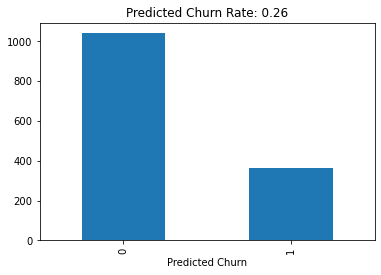

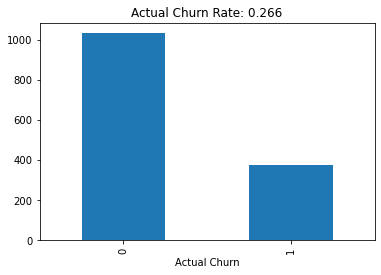

In [93]:
prediction_vis.prediction.value_counts().sort_index().plot.bar()
predicted_churn_rate = prediction_vis.prediction.mean()
plt.title(f'Predicted Churn Rate: {predicted_churn_rate:.3}')
plt.xlabel('Predicted Churn')
plt.show()

prediction_vis.actual_churn.value_counts().sort_index().plot.bar()
actual_churn_rate = prediction_vis.actual_churn.mean()
plt.title(f'Actual Churn Rate: {actual_churn_rate:.3}')
plt.xlabel('Actual Churn')
plt.show()